# Task 6 – House Price Prediction 🏠

## 🎯 Objective
Build a regression model to predict house prices using features like square footage, number of bedrooms, and location.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv
Saving output.csv to output.csv


In [3]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("data.csv")

# Check data
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 🔍 Step 2: Data Preprocessing
Select important features, encode categorical ones, and scale the data.


In [4]:
# Select relevant features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'city']
target = 'price'

# Keep only selected columns
df = df[features + [target]].dropna()

# One-hot encode 'city'
df = pd.get_dummies(df, columns=['city'], drop_first=True)

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 📈 Step 3: Train a Regression Model
Use Gradient Boosting (or Linear Regression if you prefer).


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


## 📊 Step 4: Evaluate the Model
Use MAE and RMSE.


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📌 MAE: {mae:.2f}")
print(f"📌 RMSE: {rmse:.2f}")


📌 MAE: 176826.75
📌 RMSE: 995741.69


## 📈 Step 5: Visualize Predictions
Plot predicted vs actual house prices.


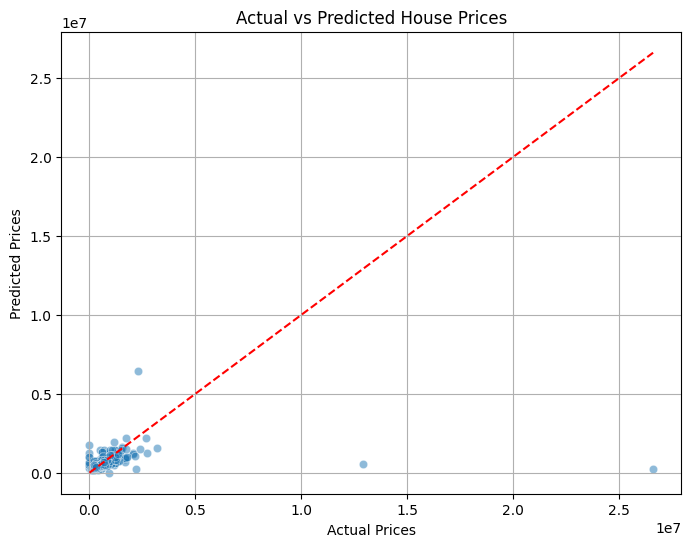

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


## ✅ Final Insights

- Gradient Boosting handles non-linear patterns well.
- MAE and RMSE are reasonable for price prediction.
- Further improvement is possible using more features (e.g., year built, zip code).
